# Miniproject 4 : Tree Based Models


We will do following 3 Tasks:
1. An example of Decsion Tree
2. Bagging, Random Forest and Boosting for Regression
3. Random Forest and Boosting for Classification

Submit your .ipynb files through Blackboard
     

# Task 1

1. For the Hitters Data we discussed in the class, split the data into 80-20 %  training and validation data. (You can get the data from the Github repo I provided in the beginning of the class.)
2. Fit a Decision Tree with Number of leaf nodes 5, 10, 15, 20, .... 50. For each model compute training error and validation errror (MSE). Plot training a graph with number of leaves vs Training and Validation MSE. 

Food for thought    
1. When we discussed Decision Treee in the class, the book mentions building decision tree are not computationally expensive. Imagine you have 1000 varaibles and 10,000 data samples(training data), sounds like a very computationally expensive task. Why the book might have the argument that decision trees are not computationally expensive?
2. Do you see any trend on training MSE and validation MSE as numbers of leaves increases? What happens if you increase the number of leaves to number of training data?


In [87]:
import pandas as pd
import numpy as np

hitters = pd.read_csv("Hitters.csv")
hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [88]:
hitters = hitters.dropna()
hitters.isnull().values.any()

False

In [89]:
from sklearn.model_selection import train_test_split

y = hitters[["Salary"]]
X = hitters.iloc[:,np.r_[1:14,16:19]]

In [90]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [92]:
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics
from sklearn.model_selection import cross_val_score

number_of_nodes = [5,10,15,20,25,30,35,40,45,50]   #I tried linspace and it produced floats instead of ints, so I manually typed it in 
train_error = []
test_error = []
cv_error = []

for node in number_of_nodes:
    dt = DecisionTreeRegressor(max_leaf_nodes=node)
    dt.fit(X_train,y_train)
    y_pred = dt.predict(X_test)
    train_error.append(dt.score(X_train,y_train))
    test_error.append(dt.score(X_test,y_test))
    

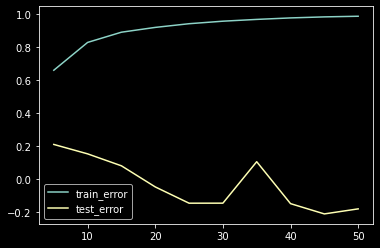

In [93]:
import matplotlib.pyplot as plt

plt.plot(number_of_nodes,train_error,label = "train_error")
plt.plot(number_of_nodes,test_error,label = "test_error")
plt.legend()
plt.show()

# Task 2

Boston Housing Data Set
(You can downlaod dataset from http://lib.stat.cmu.edu/datasets/boston or import from sklearn.dataset)
1. For a Boston Housing Data Set, split data into 80-20 % train and test. Perform Random Forest on Training Data. Compute Train Error, Out of Sample Error and Test Error (ALL MSE). 
When you do Random Forest, you will see the model depends on following three parameters: 
a. n_estimators : Numbers of Trees
b. min_samples_leaf : Minimum  numbers of samples in the leaf nodes. 
c. max_features : Numbers of Features to consider at each split during tree building.    
You can use RandomizedSearchCV from sklearn to perform grid search and find the best model pararamters.    

(Here is a good resource on Random Forest, Feature selection and parameter optimization that uses Boston Housing Dataset as an example.)      
https://towardsdatascience.com/predicting-housing-prices-using-a-scikit-learns-random-forest-model-e736b59d56c5     

2. Perform Boosting (You can use XG Boost) and compare your best validation MSE from Random Forest to Validation MSE from Boosting. 

In [94]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2)

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rfr = RandomForestRegressor().fit(X_train,y_train)

y_pred = rfr.predict(X_test)

metrics.mean_squared_error(y_pred, y_test)
train_error = rfr.score(X_train,y_train)
test_error = rfr.score(X_test,y_test)


print("Train  is: ", train_error," and test error is: ", test_error)

#This is our base case


Train  is:  0.9735849679198925  and test error is:  0.8018291379514038


In [97]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.arange(start = 10, stop = 2000, step = 10)]
max_features = [0.5,'auto', 'sqrt','log2']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

m = RandomForestRegressor()

m_random = RandomizedSearchCV(estimator = m, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
m_random.fit(X_train, y_train)
m_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, n_estimators=340; total time=   0.3s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, n_estimators=340; total time=   0.4s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, n_estimators=340; total time=   0.4s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=2, n_estimators=1100; total time=   0.8s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=2, n_estimators=1100; total time=   1.1s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=2, n_estimators=1100; total time=   0.8s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=4, n_estimators=1580; total time=   1.6s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=1480; total time=   1.3s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=1480; total time=   1.4s
[CV] END bootstrap=True,

{'n_estimators': 90,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'bootstrap': True}

In [98]:
rfr = RandomForestRegressor(n_estimators=1340,min_samples_leaf=4,max_features='auto',bootstrap='True').fit(X_train,y_train)

y_pred = rfr.predict(X_test)

metrics.mean_squared_error(y_pred, y_test)
train_error = rfr.score(X_train,y_train)
test_error = rfr.score(X_test,y_test)


print("Train  is: ", train_error," and test error is: ", test_error)

Train  is:  0.9183861791894965  and test error is:  0.7722745048870476


In [99]:
import xgboost

xgb = xgboost.XGBRegressor(use_label_encoder='False').fit(X_train,y_train)

y_pred = xgb.predict(X_test)

train_error = xgb.score(X_train,y_train)
test_error = xgb.score(X_test,y_test)


print("Train  is: ", train_error," and test error is: ", test_error)


Train  is:  0.999999991269165  and test error is:  0.7363794628755775


# Task 3
Classification of Wine Data 

In [100]:
import pandas as pd


df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

In [101]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [102]:
# Drop one of the classes so we have only two classes. 
df_wine = df_wine[df_wine['Class label'] != 1]

y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values
print(y)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3]


In [103]:
# Create Labels for classes, Encode from 2/3 to 0/1
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


le = LabelEncoder()
y = le.fit_transform(y)
print(y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


## Task 3, Do your part here
Perform Classification using Decision Tree and Bagging Classifier. Use following params      

For Decision Tree    

criterion='entropy'    
max_depth=None    
random_state=1    


For Bagging Classifier     
base_estimator=tree   
n_estimators=500    
max_samples=1.0  
max_features=1.0    
bootstrap=True   
bootstrap_features=False      
n_jobs=1       
random_state=1

Print Out your train and test accuracies for Decision Tree and Bagging Classifier

In [104]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy',max_depth=None,random_state=1).fit(X_train,y_train)

y_pred = dtc.predict(X_test)

metrics.mean_squared_error(y_pred, y_test)
train_error = dtc.score(X_train,y_train)
test_error = dtc.score(X_test,y_test)

print("Train error is: ", train_error," and test error is: ", test_error)

Train error is:  1.0  and test error is:  0.8333333333333334


In [105]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier( 
n_estimators=500,    
max_samples=1.0,  
max_features=1.0,    
bootstrap=True,   
bootstrap_features=False,      
n_jobs=1,       
random_state=1).fit(X_train, y_train)

y_pred = bag.predict(X_test)

train_error = bag.score(X_train,y_train)
test_error = bag.score(X_test,y_test)

print("Train error is: ", train_error," and test error is: ", test_error)

Train error is:  1.0  and test error is:  0.9166666666666666
